### Tests find_thymio/goal

Image dimensions are 640 x 480
Map was not successfully computed.


NameError: name 'img_rect' is not defined

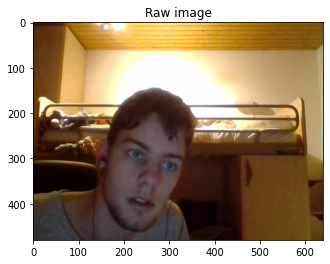

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import os

import sys  
#sys.path

sys.path.insert(1, 'src')
sys.path.insert(1, 'img')


import create_map
import locate_thymio_goal
import img_utils

from create_map import *
from locate_thymio_goal import *
from img_utils import *



filename = 'img/cam/img_normal.png'
img = cv2.imread(filename, cv2.IMREAD_COLOR)


################################################IMG_CORRECTION////////////////////////////////////////////////////

# read image
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Raw image")

# Initialize map
M, rect_width, rect_height, map, map_enlarged, success = create_map(img, 7, 11, verbose = True)
if success:
    plt.figure()
    plt.imshow(map_enlarged, origin = 'lower')
    plt.title("Map enlarged")
    plt.gca().invert_yaxis()
    plt.figure()
    plt.imshow(map, origin = 'lower')
    plt.title("Original Map")
    plt.gca().invert_yaxis()
    # We can now get the rectified image using the warp transform matrix
    # Separating the processes allow us to recalculate quickly the rectified map
    # without having to recalculate the warp transform matrix (assuming fixed camera).
    img_rect = get_rectified_img(img, M, rect_width, rect_height)
    plt.figure()
    plt.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB))
    plt.title("Rectified image")
    plt.show()
else:
    print("Map was not successfully computed.")

[thymio_pose,thymio_found] = locate_thymio_camera(img_rect,'grid', [7,11])
[goal_coords,goal_found] = locate_goal_camera(img_rect,'grid', [7,11])


#hsv = cv2.cvtColor(img_rect, cv2.COLOR_BGR2HSV)
#hsv[270, 70]
#img[270,300]
print("Thymio_pose {}".format(thymio_pose))
print("Goal_coords {}".format(goal_coords))
if(thymio_found == 0):
    print("Thymio not found!")
if(goal_found == 0) :
    print("Goal not found!")


### Get speed function

In [ ]:
	## Returns speed of the thymio in pixel/s.
    #  @param rect_img1/2    Rectified images used in the speed calculation
    #  @param dt             Elapsed time between the two images were taken
    #  @param speed_type     string variable that can take 'x_y' or 'front_side'
    #                        'x_y' the function will return the speed in x_y coordinates
    #                        'front_side' the function will return the speed in front and side coordinates
	#  @return speed         [total_speed, x_speed,y_speed] or [total_speed, front_speed,side_speed],
    #                        speed of the thymio in pixels/s.
def get_thymio_speed_camera(old_rect_img,new_rect_img,dt,speed_type):
    [thymio_pose1,thymio_found1] = locate_thymio_camera(old_rect_img,'cartesian', [7,11])
    [thymio_pose2,thymio_found2] = locate_thymio_camera(new_rect_img,'cartesian', [7,11])
    
    if (not thymio_found1) or (not thymio_found2):
        print('error!')
        return 0
    
    distance = math.sqrt(pow(thymio_pose2[0]-thymio_pose1[0],2) + pow(thymio_pose2[1]-thymio_pose1[1],2))
    print('distance:{}'.format(distance))
    total_speed = distance/dt
    #SPEED CALCULATION IN PIXEL/S
    if (speed_type == 'x_y'):
        x_speed = (thymio_pose2[0]-thymio_pose1[0])/dt
        y_speed = (thymio_pose2[1]-thymio_pose1[1])/dt
        
        speed =[total_speed,x_speed,y_speed]
        
    else:
        total_movement = [thymio_pose2[0]-thymio_pose1[0] , thymio_pose2[1]-thymio_pose1[1]]
        #u vecteur unitaire dans la direction du thymio
        u = [math.cos(thymio_pose1[2]), -math.sin(thymio_pose1[2])]
        front_movement = np.multiply(np.dot(total_movement,u),u)
        side_movement = total_movement-front_movement
        
        front_speed = math.sqrt(pow(front_movement[0],2) + pow(front_movement[1],2))/dt
        side_speed = math.sqrt(pow(side_movement[0],2) + pow(side_movement[1],2))/dt
        speed =[total_speed,front_speed,side_speed]
        
    return speed

### Speed and speed ratio measurements.

In [207]:

from MyThymio import*
thymio = MyThymio()


700
0
1
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


Text(0.5, 1.0, 'Raw image')

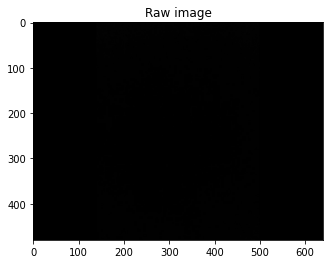

In [171]:
print(cv2.CAP_DSHOW)
IMAGE_WIDTH = 400
IMAGE_HEIGHT = 500
cam=cv2.VideoCapture(2+ cv2.CAP_DSHOW)
cam.set(3,IMAGE_WIDTH)
cam.set(4,IMAGE_HEIGHT)


img_taken = False
i = 0
while not img_taken:
    prev_img, img_taken = take_picture(cam)
    if(prev_img[0,0,0] == 230):
        img_taken = False
    print(i)
    i =i+1
    
print(prev_img)
plt.figure()
plt.imshow(cv2.cvtColor(prev_img, cv2.COLOR_BGR2RGB))
plt.title("Raw image")


In [ ]:
MAP_WIDTH = 400
MAP_HEIGHT = 500

def take_correct_img(cam):
    img = 0
    error = True
    while error:
        img_taken = False
        success = False
        while not success:
            img_taken = False
            while not img_taken:
                img, img_taken = take_picture(cam)
                t1 = time.time()
                #don't know why but some frame of my camera return a blue screen
                if(img[0,0,0] == 230):
                    img_taken = False
                    print('no image was taken!')
            M, rect_width, rect_height, map, map_enlarged, success = create_map(img, 7, 11, 0)
        rect_img = get_rectified_img(img, M, MAP_WIDTH, MAP_HEIGHT)
        [thymio_pose,thymio_found] = locate_thymio_camera(rect_img,'cartesian', [7,11])
        if(thymio_found):
            error = False
            print('Thymio found!')
        else:
            print('Thymio not found!')
    return rect_img
    

no image was taken!
no image was taken!
no image was taken!
Thymio1 not found!
Thymio1 not found!
Thymio1 not found!
Thymio1 found!
no image was taken!
Thymio1 found!
dt: 5.172793865203857
distance:119.50732195141852
Thymio_speed [23.103051284396926, -23.004976247069198, -2.1265104093929508] pixels/s
Speed_ratio (speed(pixel)/speed(input))0.23103051284396925


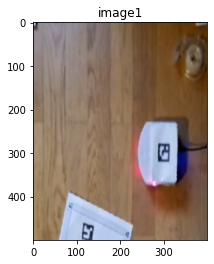

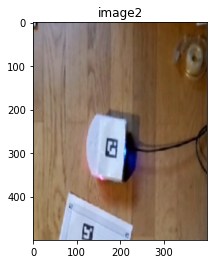

In [214]:
#IMPORTS
import camera
import MyThymio
from camera import*
import time


#th = connect_to_thymio(num_err = 20, verbose = True)
#MyThymio__init__(th, 0)

thymio.set_motor_speeds(0,0)

#INITIALIZATION
IMPUT_SPEED = 100

cam=cv2.VideoCapture(2+ cv2.CAP_DSHOW)
cam.set(3,IMAGE_WIDTH)
cam.set(4,IMAGE_HEIGHT)

prev_rect_img = take_correct_img(cam)
      

plt.figure()
plt.imshow(cv2.cvtColor(prev_rect_img, cv2.COLOR_BGR2RGB))
plt.title("image1")        

thymio.set_motor_speeds(IMPUT_SPEED,IMPUT_SPEED)

time.sleep(5)
thymio.set_motor_speeds(0,0)

cam=cv2.VideoCapture(2+ cv2.CAP_DSHOW)
cam.set(3,IMAGE_WIDTH)
cam.set(4,IMAGE_HEIGHT)

new_rect_img = take_correct_img(cam)

plt.figure()
plt.imshow(cv2.cvtColor(new_rect_img, cv2.COLOR_BGR2RGB))
plt.title("image2")        

dt = t2-t1
print('dt: {}'.format(dt))
speed = get_thymio_speed_camera(prev_rect_img,new_rect_img,dt,'x_y');
print("Thymio_speed {} pixels/s".format(speed))



#ratio speed(pixel)/speed(input)
ratio = speed[0]/IMPUT_SPEED
print("Speed_ratio (speed(pixel)/speed(input)){}".format(ratio))


### Kalman's Covariance Matrices:
Measurement of the typical covariance values to compute the Q and R matrices.

To find the total covariance for the position and the speed (covariance due to measurement AND state errors), we simply 
set a speed to the thymio and then take measurements of the speed and position of the robot from the camera. We take a lot of datapoints and then compute the covariance from those datapoints.

We also measure the position on a number of datapoints without setting any speed to the thymio. We can compute the covariance from those point to obtain the covariance of the position caused by the measurements only.
(If the values are too small or == 0 we can also approximate the position covariance by doing pos_standard_deviation = thymio_speed * sampling period.)


In [252]:

##Measurement covariance matrix (R)

#Parameters
IMAGE_WIDTH = 400
IMAGE_HEIGHT = 500
MAP_WIDTH = 400
MAP_HEIGHT = 500
IMPUT_SPEED = 100
#time between each kalman call.
KALMAN_PERIOD = 0.2
#VALUE WHEN MAP SIZE IS 500x500mm
SPEED_RATIO = 0.23

CAMERA_USED =2

#A augmenter
NB_DATAPOINTS = 20;

cam=cv2.VideoCapture(CAMERA_USED+ cv2.CAP_DSHOW)
cam.set(3,IMAGE_WIDTH)
cam.set(4,IMAGE_HEIGHT)

#position (x,y) variance

thymio.set_motor_speeds(0,0)

thymio_x = []
thymio_y = []
for x in range(NB_DATAPOINTS):
    cam=cv2.VideoCapture(CAMERA_USED+ cv2.CAP_DSHOW)
    cam.set(3,IMAGE_WIDTH)
    cam.set(4,IMAGE_HEIGHT)
    new_img_rect = take_correct_img(cam)
    [new_thymio_pose,thymio_found] = locate_thymio_camera(new_img_rect,'cartesian', [7,11])
    thymio_x = np.append(thymio_x, new_thymio_pose[0])
    thymio_y = np.append(thymio_y, new_thymio_pose[1])
    if(KALMAN_PERIOD>dt):
        time.sleep (KALMAN_PERIOD-dt)

cov_xy_R = np.cov(thymio_x,thymio_y)
print('cov_xy_R = {}'.format(cov_xy_R))
print('thymio_x = {}'.format(thymio_x))


#other method for pos_cov: thymio_speed * sampling period =~ position error 

#Total pos and speed covariance computation (R+Q)
cam=cv2.VideoCapture(CAMERA_USED+ cv2.CAP_DSHOW)
cam.set(3,IMAGE_WIDTH)
cam.set(4,IMAGE_HEIGHT)


thymio.set_motor_speeds(IMPUT_SPEED,IMPUT_SPEED)
time.sleep (0.01)

prev_rect_img = take_correct_img(cam)
prev_time = time.time()

[prev_thymio_pose,thymio_found] = locate_thymio_camera(prev_rect_img,'cartesian', [7,11])

front_error = []
side_error = []
thymio_front_speed = []
thymio_side_speed = []
t = []
total_time = 0
time.sleep (KALMAN_PERIOD)

for x in range(NB_DATAPOINTS):
    cam=cv2.VideoCapture(CAMERA_USED+ cv2.CAP_DSHOW)
    cam.set(3,IMAGE_WIDTH)
    cam.set(4,IMAGE_HEIGHT)
    new_rect_img = take_correct_img(cam)
    new_time = time.time()
    dt = new_time-prev_time
    
    [new_thymio_pose,thymio_found] = locate_thymio_camera(new_rect_img,'cartesian', [7,11])
    if(thymio_found):
        total_movement = [new_thymio_pose[0]-prev_thymio_pose[0] , new_thymio_pose[1]-prev_thymio_pose[1]]
        #u vecteur unitaire dans la direction du thymio
        u = [math.cos(prev_thymio_pose[2]), -math.sin(prev_thymio_pose[2])]
        front_movement = np.multiply(np.dot(total_movement,u),u)
        side_movement = total_movement-front_movement
        
        front_distance = math.sqrt(pow(front_movement[0],2) + pow(front_movement[1],2))
        side_distance = math.sqrt(pow(side_movement[0],2) + pow(side_movement[1],2))
        
        #eliminates the delta_t dependency in the movement 
        anticipated_front_distance = SPEED_RATIO*IMPUT_SPEED*dt
        anticipated_side_distance = 0
        front_error = np.append(front_error,anticipated_front_distance - front_distance)
        side_error = np.append(side_error,anticipated_side_distance - side_distance)     
        
        #speed_measurement
        thymio_front_speed = np.append(thymio_front_speed, front_distance/dt)
        thymio_side_speed = np.append(thymio_side_speed, side_distance/dt)
        total_time = total_time + dt
        t = np.append(t, total_time)
        print (dt)
    if(KALMAN_PERIOD>dt):
        time.sleep (KALMAN_PERIOD-dt)
        
    prev_thymio_pose = new_thymio_pose
    prev_img_rect = new_img_rect
    prev_time = new_time

thymio.set_motor_speeds(0,0)
cov_pos_front_side = np.cov(front_error,side_error)
cov_speed_front_side = np.cov(thymio_front_speed,thymio_side_speed)

print('front_speed: {}'.format(thymio_front_speed))
print('side_speed: {}'.format(thymio_side_speed))
print('front_error: {}'.format(front_error))
print('side_error: {}'.format(side_error))


print('valeurs constantes de la matrice de cov en mesure:')
print('covariance de la mesure en position {}\ncovariance totale en vitesse \n{}'.format(cov_xy_R,cov_speed_front_side))
print('covariance totale en position \n{}'.format(cov_pos_front_side))
print('la covariance totale de la vitesse et de la position est exprimée en fonction de l orientation du thymio, il faut maintenant l exprimer en fct des axes x et y')
#We then need to convert this values in x_y coordinates



no image was taken!
Thymio1 found!
no image was taken!
Thymio1 found!
no image was taken!
Thymio1 found!
no image was taken!
Thymio1 found!
Thymio1 found!
no image was taken!
Thymio1 found!
no image was taken!
Thymio1 found!
no image was taken!
Thymio1 found!
no image was taken!
Thymio1 found!
no image was taken!
Thymio1 found!
no image was taken!
Thymio1 found!
no image was taken!
Thymio1 found!
no image was taken!
Thymio1 found!
no image was taken!
Thymio1 found!
no image was taken!
Thymio1 found!
no image was taken!
Thymio1 found!
no image was taken!
Thymio1 found!
Thymio1 found!
no image was taken!
Thymio1 found!
no image was taken!
no image was taken!
Thymio1 found!
cov_xy_R = [[0.34473684 0.05526316]
 [0.05526316 0.55526316]]
thymio_x = [323. 322. 323. 323. 322. 321. 323. 322. 323. 323. 322. 323. 323. 323.
 323. 323. 322. 323. 323. 323.]
no image was taken!
Thymio1 found!
no image was taken!
Thymio1 found!
0.4672367572784424
no image was taken!
Thymio1 found!
0.21097326278686523


In [220]:
thymio.set_motor_speeds(0,0)

The values for the total covariance are given in the Thymio's reference frame, we then need to turn them into x-y coordinates to be able to use them in our Kalman filter.

The function below returns the Q and R covariance matrices. It uses the angle of the thymio and the covariance values (const) computed with the above script, and returns the entire covariance matrices with x_y coordinates.

In [267]:
#replace with values found in the previous script


#valeurs obtained with a 50cm squared map and a kalman period of ~0.05s (camera wasn't completely stable)

COV_XY_R = [[0.34473684, 0.05526316],[0.05526316, 0.55526316]]
COV_SPEED_FRONT_SIDE = [[20.03169028, -3.85737828],[-3.85737828,  9.56008048]]
COV_POS_FRONT_SIDE =  [[ 1.35427252, -0.34359683],[-0.34359683,  0.47829051]]

#returns Q and R covariance matrices 
    #  @param angle          Angle of the thymio (rad)
	#  @return Q             (4x4) state moise covariance matrix 
    #  @return R             (4x4) measurement noise covariance matrix

def get_covariance_matrices(angle):
    
    Rotation = [[math.cos(angle),-math.sin(angle)],[math.sin(angle),math.cos(angle)]]
    cov_speed_xy = np.dot(np.dot(Rotation,COV_SPEED_FRONT_SIDE),np.transpose(Rotation))
    cov_pos_xy = np.dot(np.dot(Rotation,COV_POS_FRONT_SIDE),np.transpose(Rotation))

    #we assume that 30% the error observed is due to the measurements (70% is generated by perturbations to the states)
    cov_speed_xy_R = np.multiply(cov_speed_xy,0.3)
    cov_speed_xy_Q = np.multiply(cov_speed_xy,0.7)

    R1 = np.append(cov_xy_R[0],[0,0])
    R2 = np.append(cov_xy_R[1],[0,0])
    R3 = np.append([0,0],cov_speed_xy_R[0])
    R4 = np.append([0,0],cov_speed_xy_R[1])
    R = [R1,R2,R3,R4]

    print('Matrice de covariance pour la mesure(R):\n{}'.format(np.multiply(R,1)))

    #cov_pos_Q=~ cov_pos_tot 
    cov_xy_Q = cov_pos_xy

    Q1 = np.append(cov_xy_Q[0],[0,0])
    Q2 = np.append(cov_xy_Q[1],[0,0])
    Q3 = np.append([0,0],cov_speed_xy_Q[0])
    Q4 = np.append([0,0],cov_speed_xy_Q[1])
    Q = [Q1,Q2,Q3,Q4]
    print('Matrice de covariance de l état(Q):\n{}'.format(np.multiply(Q,1)))
    
    return Q,R

### Tests

In [269]:
Q,R = get_covariance_matrices(angle = 0)

Matrice de covariance pour la mesure(R):
[[ 0.34473684  0.05526316  0.          0.        ]
 [ 0.05526316  0.55526316  0.          0.        ]
 [ 0.          0.          6.00950708 -1.15721348]
 [ 0.          0.         -1.15721348  2.86802414]]
Matrice de covariance de l état(Q):
[[ 1.35427252 -0.34359683  0.          0.        ]
 [-0.34359683  0.47829051  0.          0.        ]
 [ 0.          0.         14.0221832  -2.7001648 ]
 [ 0.          0.         -2.7001648   6.69205634]]


In [ ]:
a = [1,2]
b = [2,-1]

c = [a[0]-b[0],a[1]-b[1]]
np.dot(a,b)
d = np.multiply(a,np.dot(a,b))
print(d)

print(np.cov(a,b))

In [ ]:

old_img = cv2.imread('img/speed_test3.png', cv2.IMREAD_COLOR)
old_rect_img = get_rectified_img(old_img, M, rect_width, rect_height)
plt.figure()
plt.imshow(cv2.cvtColor(old_rect_img, cv2.COLOR_BGR2RGB))
plt.title("Pos1")

new_img = cv2.imread('img/speed_test1.png', cv2.IMREAD_COLOR)
new_rect_img = get_rectified_img(new_img, M, rect_width, rect_height)
plt.figure()
plt.imshow(cv2.cvtColor(new_rect_img, cv2.COLOR_BGR2RGB))
plt.title("Pos2")

dt = 1

get_thymio_speed_camera(old_rect_img,new_rect_img,dt,'front_side')

In [ ]:
A =[[1,3],[2,3]]
print(A)

B = [[2,1],[1,8]]

C1 = np.append(A[0],[0,0])
C2 = np.append(A[1],[0,0])
C = [C1,C2]

print(C)

D = np.multiply(C,1)
print('D{} \n A{}'.format(D,A))
print('la covariance en vitesse est exprimée en fonction de l orientation du thymio, il faut maintenant lexprimer en fct des axes x et y')

In [228]:
get_covariance_matrices(0)

Matrice de covariance pour la mesure(R):
[[ 0.89210526  0.01578947  0.          0.        ]
 [ 0.01578947  1.58947368  0.          0.        ]
 [ 0.          0.          6.44371946 -0.62111586]
 [ 0.          0.         -0.62111586  3.21368764]]
(dans cet exemple angle = 30degrés)
Matrice de covariance de l état(Q):
[[ 1.38404549 -0.08164515  0.          0.        ]
 [-0.08164515  0.85363792  0.          0.        ]
 [ 0.          0.          6.44371946 -0.62111586]
 [ 0.          0.         -0.62111586  3.21368764]]
(dans cet exemple angle = 30degrés)


([array([ 1.38404549, -0.08164515,  0.        ,  0.        ]),
  array([-0.08164515,  0.85363792,  0.        ,  0.        ]),
  array([ 0.        ,  0.        ,  6.44371946, -0.62111586]),
  array([ 0.        ,  0.        , -0.62111586,  3.21368764])],
 [array([0.89210526, 0.01578947, 0.        , 0.        ]),
  array([0.01578947, 1.58947368, 0.        , 0.        ]),
  array([ 0.        ,  0.        ,  6.44371946, -0.62111586]),
  array([ 0.        ,  0.        , -0.62111586,  3.21368764])])

In [ ]:
def returnCameraIndexes():
    # checks the first 10 indexes.
    index = 0
    arr = []
    i = 10
    while i > 0:
        cap = cv2.VideoCapture(index)
        if cap.read()[0]:
            arr.append(index)
            cap.release()
        index += 1
        i -= 1
    return arr

In [ ]:
print(returnCameraIndexes())